## Load The Dataset

In [1]:
# import necessary libraries
import pandas as pd

In [2]:
# Load the dataset from the CSV file
file_name = 'uncleaned_carbon_footprint_dataset.csv'
df = pd.read_csv(file_name)

## Data processing and Cleaning

### In the processing and cleaning we have checked for miising values, duplicates, year column to datetime format for better handling of time related data, and round the numerical columns to two decimal places to ensure uniformity in the data. Finally we saved our cleaned dataset.

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Company                    0
Year                       0
Scope1_Emissions           0
Scope2_Emissions           0
Scope3_Emissions           0
Energy_Consumption         0
Production_Volume          0
Transportation_Distance    0
Waste_Generated            0
Revenue                    0
dtype: int64


In [4]:
# Let's see the first 5 rows of our dataset
df.head()

,Company,Year,Scope1_Emissions,Scope2_Emissions,Scope3_Emissions,Energy_Consumption,Production_Volume,Transportation_Distance,Waste_Generated,Revenue
0,Company 1,2020,3184.292148,2680.241144,1568.606594,75017.702584,612,3482.905977,737.070146,5.993909e+06
1,Company 2,2016,5631.347873,4208.203523,1957.773577,31688.090737,955,3939.705150,719.958769,2.124183e+06
2,Company 3,2021,4354.002111,4973.023840,1970.145093,60344.975039,799,3788.799062,907.945599,6.788750e+06
3,Company 4,2022,7958.130767,4767.188253,650.496365,95479.680237,821,3475.534004,680.177513,7.553733e+06
4,Company 5,2019,4119.543878,1295.294884,1240.644496,10500.320538,763,2043.068476,561.443405,2.358337e+06


In [5]:
# Let's see the last 5 rows of our dataset
df.tail()

,Company,Year,Scope1_Emissions,Scope2_Emissions,Scope3_Emissions,Energy_Consumption,Production_Volume,Transportation_Distance,Waste_Generated,Revenue
99995,Company 99996,2021,3930.657644,1442.091452,1184.399575,66604.039944,452,3500.099041,157.715111,8.926244e+06
99996,Company 99997,2021,2834.791781,869.047392,880.925972,89167.095906,214,3044.098878,379.283197,8.044697e+06
99997,Company 99998,2019,3978.730971,2419.336928,785.840250,54633.289529,537,1712.052568,348.395948,6.854597e+06
99998,Company 99999,2018,2103.997036,1447.861254,732.195810,43310.232214,352,4746.732971,482.719376,4.215246e+06
99999,Company 100000,2017,4692.645063,2786.970579,603.436294,64510.995328,422,4602.325851,502.684331,8.628742e+06


In [6]:
# Let's check the dimensions of the dataframe
df.shape

(100000, 10)

In [7]:
# To check how many duplicates are there

df.duplicated().sum()

0

In [8]:
# let's look at the statistical aspects of the dataframe
df.describe()

,Year,Scope1_Emissions,Scope2_Emissions,Scope3_Emissions,Energy_Consumption,Production_Volume,Transportation_Distance,Waste_Generated,Revenue
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,2018.498450,5491.638001,2751.623988,1097.720948,55110.980674,548.982280,2997.739330,550.501052,5.491421e+06
std,2.291412,2594.296227,1296.461652,518.589097,25951.634132,259.248659,1153.647638,260.550736,2.599611e+06
min,2015.000000,1000.014956,500.077436,200.005908,10001.058492,100.000000,1000.010665,100.007534,1.000048e+06
25%,2017.000000,3251.175618,1630.683794,648.986559,32695.122963,325.000000,2000.787654,324.415786,3.235947e+06
50%,2018.000000,5489.162334,2751.762010,1095.963314,55196.046605,548.000000,2993.409938,551.647740,5.496739e+06
75%,2021.000000,7738.638948,3875.554566,1544.362113,77573.570822,773.000000,3997.455529,776.597774,7.726530e+06
max,2022.000000,9999.850510,4999.956092,1999.996246,99998.243634,999.000000,4999.963552,999.989269,9.999944e+06


In [9]:
# Let's see the type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Company                  100000 non-null  object 
 1   Year                     100000 non-null  int64  
 2   Scope1_Emissions         100000 non-null  float64
 3   Scope2_Emissions         100000 non-null  float64
 4   Scope3_Emissions         100000 non-null  float64
 5   Energy_Consumption       100000 non-null  float64
 6   Production_Volume        100000 non-null  int64  
 7   Transportation_Distance  100000 non-null  float64
 8   Waste_Generated          100000 non-null  float64
 9   Revenue                  100000 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 7.6+ MB


In [10]:
# Convert 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [11]:
# Round numerical columns to two decimal places
numeric_columns = ['Scope1_Emissions', 'Scope2_Emissions', 'Scope3_Emissions', 'Energy_Consumption',
                   'Production_Volume', 'Transportation_Distance', 'Waste_Generated', 'Revenue']
df[numeric_columns] = df[numeric_columns].round(2)

In [12]:
# sort the DataFrame by 'Year' in ascending order
df.sort_values(by='Year', inplace=True)

In [13]:
# Save the cleaned dataset to a new CSV file
cleaned_file_name = 'cleaned_carbon_footprint_dataset.csv'
df.to_csv(cleaned_file_name, index=False)

In [14]:
print(f"Data processing and cleaning completed. Cleaned dataset saved as {cleaned_file_name}.")

Data processing and cleaning completed. Cleaned dataset saved as cleaned_carbon_footprint_dataset.csv.


# Carbon Calculation Methodologies

### The next step in the carbon footprint analysis process is to apply carbon calculation methodologies to estimate greenhouse gas emissions accurately. Different methodologies may be used depending on the scope of the analysis and the specific requirements. Let's use widely adopted "Greenhouse Gas Protocol" methodology, which categorizes emissions into three scopes: Scope 1, Scope 2, and Scope 3.

### Here's how we can calculate the carbon footprint using the Greenhouse Gas Protocol methodology:

### • Scope 1 Emissions (Direct Emissions):
#### Scope 1 emissions include direct greenhouse gas emissions from sources that are owned or controlled by the company. This typically includes emissions from combustion of fuels (e.g., natural gas, diesel), process emissions, and fugitive emissions.

#### Calculation: Scope1_Emissions = Direct emissions from combustion + Direct process emissions + Fugitive emissions.

### • Scope 2 Emissions (Indirect Emissions from Purchased Electricity):
#### Scope 2 emissions include indirect greenhouse gas emissions from the consumption of purchased electricity, heat, or steam.

#### Calculation: Scope2_Emissions = Indirect emissions from purchased electricity.

### • Scope 3 Emissions (Other Indirect Emissions):
#### Scope 3 emissions are all other indirect emissions that occur as a result of the company's activities but are not directly owned or controlled by the company. This can include emissions from the entire supply chain, employee commuting, business travel, and other outsourced activities.

#### Calculation: Scope3_Emissions = Emissions from supply chain activities + Emissions from employee commuting + Emissions from business travel + Other outsourced activities.

### • To calculate the total carbon footprint, we can sum up the emissions from each scope:

#### Total Carbon Footprint = Scope1_Emissions + Scope2_Emissions + Scope3_Emissions

### we can implement this calculation in python:

In [15]:
# Calculate Scope 1, Scope 2, and Scope 3 emissions
df['Total_Scope1_Emissions'] = df['Scope1_Emissions']
df['Total_Scope2_Emissions'] = df['Scope2_Emissions']
df['Total_Scope3_Emissions'] = df['Scope3_Emissions']

In [16]:
# Calculate Total Carbon Footprint
df['Total_Carbon_Footprint'] = df['Total_Scope1_Emissions'] + df['Total_Scope2_Emissions'] + df['Total_Scope3_Emissions']

In [17]:
# round the calculated values to two decimal places
df = df.round(2)

In [18]:
# Save the dataset with calculated carbon footprint to a new CSV file
calculated_file_name = 'carbon_footprint_calculated_dataset.csv'
df.to_csv(calculated_file_name, index=False)

In [19]:
print(f"Carbon footprint calculation completed. Dataset with calculated carbon footprint saved as {calculated_file_name}.")

Carbon footprint calculation completed. Dataset with calculated carbon footprint saved as carbon_footprint_calculated_dataset.csv.


# Data Analysis and Visualization

In [20]:
# import necessary libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Load the dataset with calculated carbon footprint from the CSV file
calculated_file_name = 'carbon_footprint_calculated_dataset.csv'
df = pd.read_csv(calculated_file_name)

In [22]:
# Summary statistics of the carbon footprint
summary_stats = df[['Total_Carbon_Footprint']].describe()
print("Summary Statistics of Carbon Footprint:")
print(summary_stats)

Summary Statistics of Carbon Footprint:
       Total_Carbon_Footprint
count           100000.000000
mean              9340.982949
std               2947.861791
min               1874.190000
25%               7075.657500
50%               9340.265000
75%              11597.312500
max              16952.000000


In [23]:
# Top companies with highest carbon footprints
top_companies = df.nlargest(10, 'Total_Carbon_Footprint')
print("\nTop Companies with Highest Carbon Footprints:")
print(top_companies[['Company', 'Total_Carbon_Footprint']])


Top Companies with Highest Carbon Footprints:
             Company  Total_Carbon_Footprint
8188   Company 46597                16952.00
59317  Company 20906                16864.47
97939  Company 38973                16830.91
98644  Company 80010                16745.14
69893  Company 33579                16715.51
32684  Company 88752                16714.18
79447  Company 86433                16710.08
93002  Company 77217                16693.17
22012  Company 68599                16672.80
26577  Company 66515                16666.18


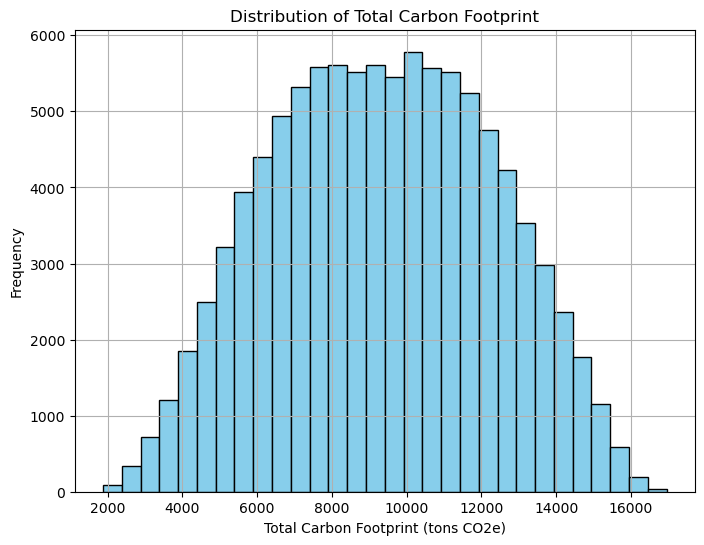

In [24]:
# Histogram of total carbon footprint
plt.figure(figsize=(8, 6))
plt.hist(df['Total_Carbon_Footprint'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Total Carbon Footprint (tons CO2e)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Carbon Footprint')
plt.grid(True)
plt.show()

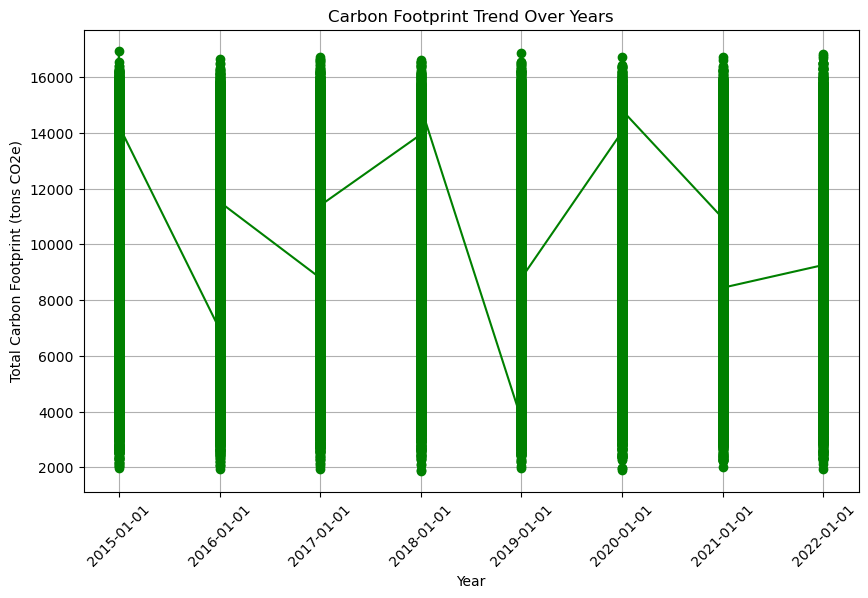

In [25]:
# Line plot of carbon footprint over years
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Total_Carbon_Footprint'], marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Total Carbon Footprint (tons CO2e)')
plt.title('Carbon Footprint Trend Over Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Benchmarking and Targets

#### Compare the calculated carbon footprints against  other organizations data. Set reduction targets based on the analysis and identify areas for improvement.

In [26]:
# Load the original dataset with calculated carbon footprint from the CSV file
original_dataset_file = 'carbon_footprint_calculated_dataset.csv'
df_original = pd.read_csv(original_dataset_file)

In [27]:
# Number of benchmark companies to select
num_benchmark_companies = 800

In [28]:
# Randomly select benchmark companies using sample() function
benchmark_df = df_original.sample(n=num_benchmark_companies, random_state=42)

In [29]:
# Save the benchmark data to a CSV file
benchmark_file_name = 'random_sample_benchmark_data_800.csv'
benchmark_df.to_csv(benchmark_file_name, index=False)

In [30]:
print(f"Randomly sampled benchmark data for {num_benchmark_companies} companies saved as {benchmark_file_name}.")

Randomly sampled benchmark data for 800 companies saved as random_sample_benchmark_data_800.csv.


In [31]:
# Load the dataset with calculated carbon footprint from the CSV file
calculated_file_name = 'carbon_footprint_calculated_dataset.csv'
df_calculated = pd.read_csv(calculated_file_name)

In [32]:
# Load the benchmark dataset from the CSV file
benchmark_file_name = 'random_sample_benchmark_data_800.csv'
df_benchmark = pd.read_csv(benchmark_file_name)

In [33]:
# Merge the calculated dataset with the benchmark data based on Company names
merged_df = pd.merge(df_calculated, df_benchmark, on='Company', suffixes=('_Organization', '_Benchmark'))

In [34]:
# Calculate the difference between the organization's carbon footprint and the benchmark
merged_df['Difference'] = merged_df['Total_Carbon_Footprint_Organization'] - merged_df['Total_Carbon_Footprint_Benchmark']

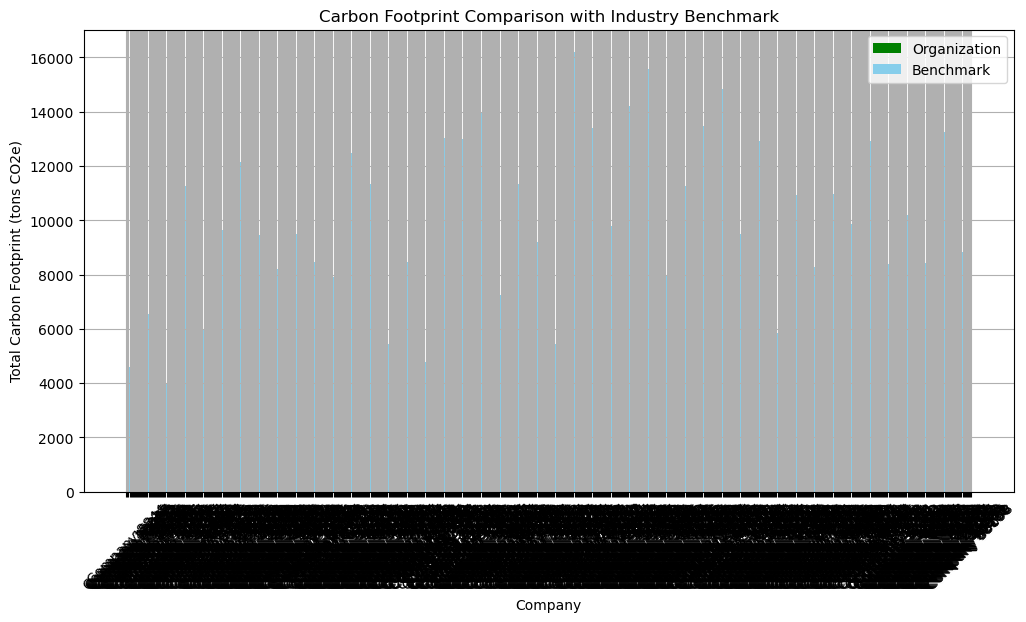

In [35]:
# Data Visualization for Benchmarking
# Bar plot to compare carbon footprints with benchmarks
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Company'], merged_df['Total_Carbon_Footprint_Organization'], label='Organization', color='green')
plt.bar(merged_df['Company'], merged_df['Total_Carbon_Footprint_Benchmark'], label='Benchmark', color='skyblue')
plt.xlabel('Company')
plt.ylabel('Total Carbon Footprint (tons CO2e)')
plt.title('Carbon Footprint Comparison with Industry Benchmark')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

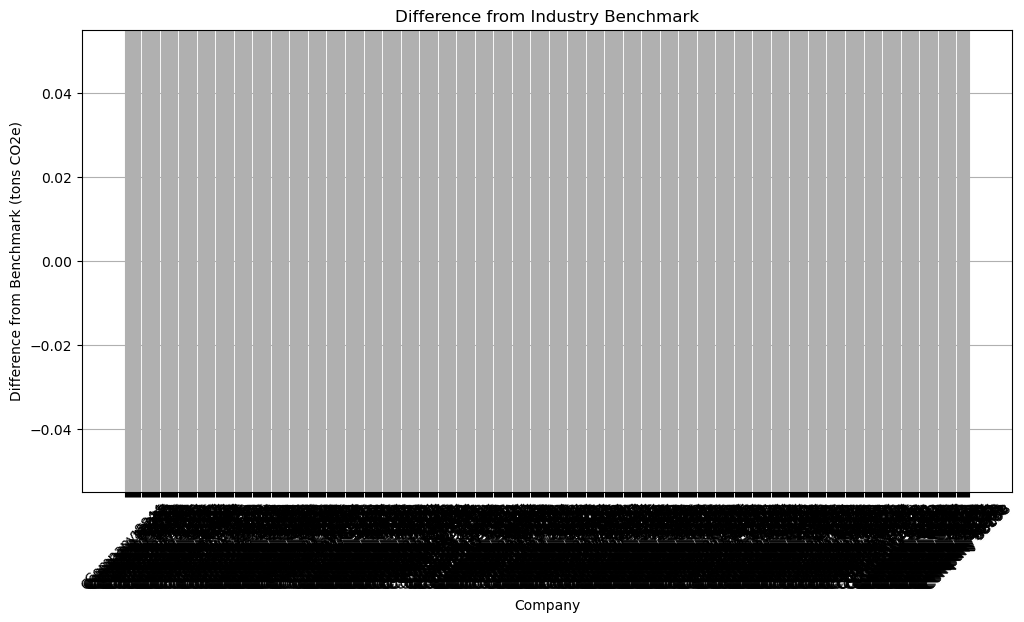

In [36]:
# Bar plot to show the difference from benchmark
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Company'], merged_df['Difference'], color='orange')
plt.xlabel('Company')
plt.ylabel('Difference from Benchmark (tons CO2e)')
plt.title('Difference from Industry Benchmark')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [37]:
# Setting Reduction Targets
# Calculate the average difference from the benchmark
average_difference = merged_df['Difference'].mean()

In [38]:
# Set a realistic reduction target
reduction_target = average_difference * 0.05

In [39]:
print(f"Average Difference from Benchmark: {average_difference:.2f} tons CO2e")
print(f"Realistic Reduction Target: {reduction_target:.2f} tons CO2e")

Average Difference from Benchmark: 0.00 tons CO2e
Realistic Reduction Target: 0.00 tons CO2e


# Hotspots

In [40]:
# Load the dataset with calculated carbon footprint from the CSV file
calculated_file_name = 'carbon_footprint_calculated_dataset.csv'
df_calculated = pd.read_csv(calculated_file_name)

In [41]:
# Group the data by emission scope and calculate the total carbon footprint for each scope
scope1_total = df_calculated['Scope1_Emissions'].sum()
scope2_total = df_calculated['Scope2_Emissions'].sum()
scope3_total = df_calculated['Scope3_Emissions'].sum()

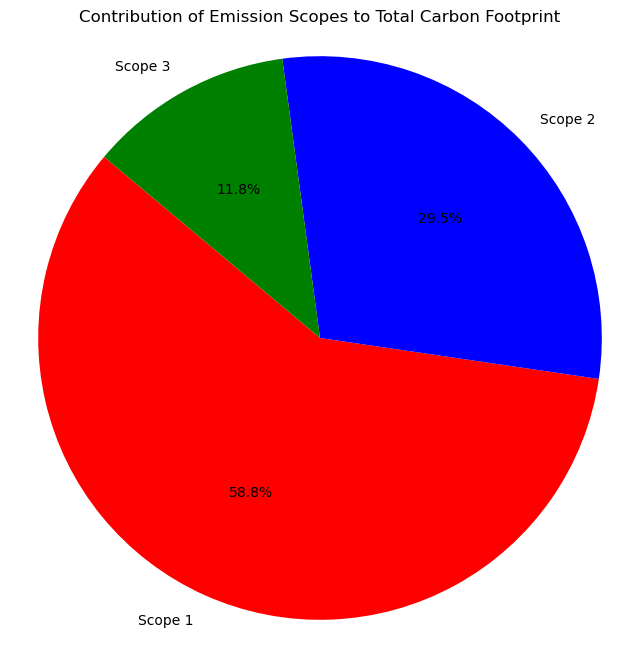

In [42]:
# Data Visualization for Hotspots
# Pie chart to show the contribution of each scope to the total carbon footprint
labels = ['Scope 1', 'Scope 2', 'Scope 3']
sizes = [scope1_total, scope2_total, scope3_total]
colors = ['red', 'blue', 'green']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Contribution of Emission Scopes to Total Carbon Footprint')
plt.show()

In [43]:
# Identify hotspots for each emission scope
hotspots_scope1 = df_calculated.nlargest(5, 'Scope1_Emissions')
hotspots_scope2 = df_calculated.nlargest(5, 'Scope2_Emissions')
hotspots_scope3 = df_calculated.nlargest(5, 'Scope3_Emissions')

In [44]:
# Print the top 5 hotspots for each emission scope
print("Top 5 Hotspots for Scope 1 Emissions:")
print(hotspots_scope1[['Company', 'Scope1_Emissions']])
print("\nTop 5 Hotspots for Scope 2 Emissions:")
print(hotspots_scope2[['Company', 'Scope2_Emissions']])
print("\nTop 5 Hotspots for Scope 3 Emissions:")
print(hotspots_scope3[['Company', 'Scope3_Emissions']])

Top 5 Hotspots for Scope 1 Emissions:
             Company  Scope1_Emissions
53739    Company 239           9999.85
96950  Company 18460           9999.82
71959  Company 10514           9999.74
69689  Company 47441           9999.69
77713  Company 18612           9999.69

Top 5 Hotspots for Scope 2 Emissions:
             Company  Scope2_Emissions
99508  Company 35287           4999.96
90563  Company 92019           4999.87
2339   Company 15850           4999.82
75257  Company 33603           4999.71
3935   Company 43625           4999.59

Top 5 Hotspots for Scope 3 Emissions:
             Company  Scope3_Emissions
24543  Company 74937           2000.00
45140  Company 57479           1999.97
47057  Company 27694           1999.97
57210  Company 78531           1999.94
20639  Company 98895           1999.92


#### By identifying hotspots, your organization can focus on implementing targeted strategies to reduce emissions in the areas where they have the most significant environmental impact. This analysis is vital for effective carbon management and sustainability efforts.

# Machine Learning on the Calculated datset

##  1.Data Preprocessing

### Cleaning the dataset

In [45]:
# Import necessary libraries
import pandas as pd

In [46]:
# Load the dataset
dataset_path = 'carbon_footprint_calculated_dataset.csv'
df = pd.read_csv(dataset_path)

In [47]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Company                    0
Year                       0
Scope1_Emissions           0
Scope2_Emissions           0
Scope3_Emissions           0
Energy_Consumption         0
Production_Volume          0
Transportation_Distance    0
Waste_Generated            0
Revenue                    0
Total_Scope1_Emissions     0
Total_Scope2_Emissions     0
Total_Scope3_Emissions     0
Total_Carbon_Footprint     0
dtype: int64


In [48]:
# To check how many duplicates are there

df.duplicated().sum()

0

In [49]:
# To find outliers in numerical columns.
numerical_columns = ['Scope1_Emissions', 'Scope2_Emissions', 'Scope3_Emissions', 'Energy_Consumption',
                     'Production_Volume', 'Transportation_Distance', 'Waste_Generated', 'Revenue',
                     'Total_Scope1_Emissions', 'Total_Scope2_Emissions', 'Total_Scope3_Emissions', 'Total_Carbon_Footprint']

for column in numerical_columns:
    lower_bound = df[column].mean() - 3 * df[column].std()
    upper_bound = df[column].mean() + 3 * df[column].std()
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [50]:
# importing the libraries for visualizing the outliers in the columns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

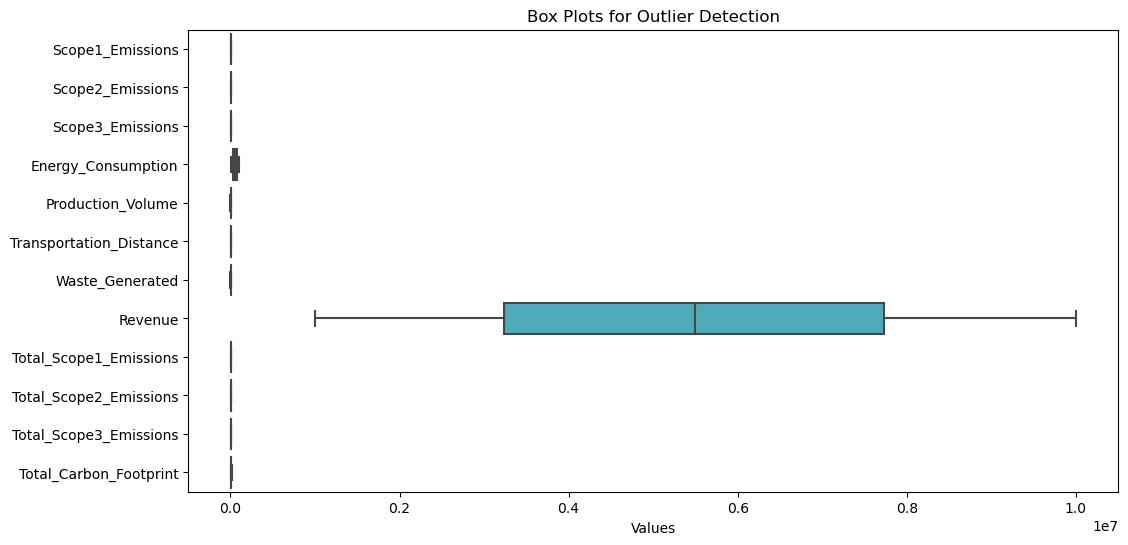

In [51]:
# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns], orient="h")
plt.title("Box Plots for Outlier Detection")
plt.xlabel("Values")
plt.show()

In [52]:
# Save the cleaned dataset
cleaned_dataset_path = 'cleaned_carbon_footprint_calculated_dataset.csv'
df.to_csv(cleaned_dataset_path, index=False)

In [53]:
print("Cleaned dataset saved:", cleaned_dataset_path)

Cleaned dataset saved: cleaned_carbon_footprint_calculated_dataset.csv


### Encoding the categorical variables

In [54]:
## We have done feature engineering to both of our categorical variables

In [55]:
# we are going to do a combination of frequency and target enconding
# Calculate frequency and mean carbon footprint for each company
company_info = df.groupby('Company').agg({'Total_Carbon_Footprint': 'mean', 'Company': 'count'})

In [56]:
# Rename columns for clarity
company_info.rename(columns={'Total_Carbon_Footprint': 'Company_Carbon_Mean', 'Company': 'Company_Frequency'}, inplace=True)

In [57]:
# Merge the information back to the main dataframe
df = df.merge(company_info, left_on='Company', right_index=True, how='left')

In [58]:
# Drop the 'Company' column
df = df.drop(columns=['Company'])

In [59]:
# Extract the year from the date-like format in 'Year' column
df['Year'] = pd.to_datetime(df['Year']).dt.year

In [60]:
# Calculate the age of the company
current_year = pd.Timestamp.now().year
df['Company_Age'] = current_year - df['Year']

In [61]:
print(df.columns)

Index(['Year', 'Scope1_Emissions', 'Scope2_Emissions', 'Scope3_Emissions',
       'Energy_Consumption', 'Production_Volume', 'Transportation_Distance',
       'Waste_Generated', 'Revenue', 'Total_Scope1_Emissions',
       'Total_Scope2_Emissions', 'Total_Scope3_Emissions',
       'Total_Carbon_Footprint', 'Company_Carbon_Mean', 'Company_Frequency',
       'Company_Age'],
      dtype='object')


### Feature Selection

In [62]:
# So for feature selection we are using Feature Importance from Trees (random forest)
# Import the necessary libraries 
from sklearn.ensemble import RandomForestRegressor

In [63]:
# Splitting the dataset into features (X) and target (y)
X = df.drop('Total_Carbon_Footprint', axis=1)  # Features
y = df['Total_Carbon_Footprint']  # Target

In [64]:
# Create a Random Forest model
model = RandomForestRegressor()

In [65]:
# Fit the model to the data
model.fit(X, y)

RandomForestRegressor()

In [66]:
# Get feature importances
feature_importances = model.feature_importances_

In [67]:
# Pair features with their importance scores
feature_importance_pairs = list(zip(X.columns, feature_importances))

In [68]:
# Sort features by importance in descending order
sorted_feature_importance = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

In [69]:
# Print the sorted feature importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Company_Carbon_Mean: 0.9999999075161888
Production_Volume: 1.63574819923739e-08
Total_Scope2_Emissions: 1.1405640403757745e-08
Scope2_Emissions: 1.0409171693827405e-08
Total_Scope3_Emissions: 1.0300872127868975e-08
Scope3_Emissions: 8.472901731164282e-09
Scope1_Emissions: 5.313436325993831e-09
Total_Scope1_Emissions: 5.096011208267004e-09
Year: 5.048406162258891e-09
Energy_Consumption: 4.666678096490267e-09
Transportation_Distance: 4.666298360937896e-09
Revenue: 4.114005858967543e-09
Waste_Generated: 3.3602782636937014e-09
Company_Age: 3.2726289225184137e-09
Company_Frequency: 0.0


### Split the dataset

In [70]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split

In [71]:
# Separate the target variable
y = df['Total_Carbon_Footprint']

In [72]:
# Drop the target variable from the features
X = df.drop('Total_Carbon_Footprint', axis=1)

In [73]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Print the shapes of the subsets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80000, 15)
X_test shape: (20000, 15)
y_train shape: (80000,)
y_test shape: (20000,)


## 2. Feature scaling

In [75]:
# lets perform Standardization to our features
# import necessary libraries
from sklearn.preprocessing import StandardScaler

In [76]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [77]:
# Fit and transform the scaler on the training features
X_train_scaled = scaler.fit_transform(X_train)

In [78]:
# Transform the test features using the same scaler
X_test_scaled = scaler.transform(X_test)

## 3. Machine learning models

### Linear regression

In [79]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [80]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [81]:
# Predict on the test set
y_pred = model.predict(X_test)

In [82]:
# Calculate evaluation metrics
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = mean_squared_error(y_test, y_pred, squared=False)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

In [83]:
# Print the evaluation metrics
print("Mean Squared Error:", lr_mse)
print("Root Mean Squared Error:", lr_rmse)
print("Mean Absolute Error:", lr_mae)
print("R-squared:", lr_r2)

Mean Squared Error: 3.500263141744214e-21
Root Mean Squared Error: 5.916302174284385e-11
Mean Absolute Error: 5.057047474110732e-11
R-squared: 1.0


#### we colud see that multiple leniar regression model is predicting the target variable with very high accuracy, which means ovefitting in some cases.

In [84]:
# checking for overfitting with cross validation
# import necessary libraries
from sklearn.model_selection import cross_val_score
import numpy as np


In [85]:
# Assuming 'X' is your feature matrix and 'y' is your target vector
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

In [86]:
# Convert negative MSE scores to positive
mse_scores = -scores

In [87]:
# Calculate mean and standard deviation of MSE scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

In [88]:
print("Mean MSE:", mean_mse)
print("Standard Deviation of MSE:", std_mse)

Mean MSE: 7.860410055415287e-21
Standard Deviation of MSE: 4.670766585721506e-21


In [89]:
# lets test on new data
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Train your model on the training set
model.fit(X_train, y_train)

LinearRegression()

In [91]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [92]:
# Evaluate the model's performance on the test set using metrics like MSE, RMSE, MAE, R-squared
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

In [93]:
print("Test Mean Squared Error:", test_mse)
print("Test Root Mean Squared Error:", test_rmse)
print("Test Mean Absolute Error:", test_mae)
print("Test R-squared:", test_r2)

Test Mean Squared Error: 3.500263141744214e-21
Test Root Mean Squared Error: 5.916302174284385e-11
Test Mean Absolute Error: 5.057047474110732e-11
Test R-squared: 1.0


#### while looking the test set we find out that it is not overfitting.

### Random forest regression

In [94]:
# import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [95]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor()

In [96]:
# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [97]:
# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

In [98]:
# Calculate evaluation metrics
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

In [99]:
# Print the evaluation metrics
print("Random Forest Regression:")
print("Mean Squared Error:", rf_mse)
print("Root Mean Squared Error:", rf_rmse)
print("Mean Absolute Error:", rf_mae)
print("R-squared:", rf_r2)

Random Forest Regression:
Mean Squared Error: 0.20824947456547252
Root Mean Squared Error: 0.4563435926639844
Mean Absolute Error: 0.13622861500001632
R-squared: 0.9999999759278654


### Gradient boosting regression

In [100]:
# import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor

In [101]:
# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor()

In [102]:
# Train the model on the training data
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [103]:
# Predict on the test data
gb_y_pred = gb_model.predict(X_test_scaled)

In [104]:
# Evaluate the model's performance
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

In [105]:
# Print the evaluation metrics
print("Gradient Boosting Regression:")
print("Mean Squared Error:", gb_mse)
print("Root Mean Squared Error:", gb_rmse)
print("Mean Absolute Error:", gb_mae)
print("R-squared:", gb_r2)

Gradient Boosting Regression:
Mean Squared Error: 621.6918018079459
Root Mean Squared Error: 24.933748250272078
Mean Absolute Error: 19.168102038950877
R-squared: 0.9999281369195909


### Support vector machine

In [106]:
# import necessary libraries
from sklearn.svm import SVR

In [107]:
# Create an SVR model
svr_model = SVR()

In [108]:
# Fit the model on the training data
svr_model.fit(X_train_scaled, y_train)

SVR()

In [109]:
# Predict on the test data
svr_y_pred = svr_model.predict(X_test_scaled)

In [110]:
# Calculate evaluation metrics
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

In [111]:
# Print the evaluation metrics
print("Support Vector Regression:")
print("Mean Squared Error:", svr_mse)
print("Root Mean Squared Error:", svr_rmse)
print("Mean Absolute Error:", svr_mae)
print("R-squared:", svr_r2)

Support Vector Regression:
Mean Squared Error: 794447.87298954
Root Mean Squared Error: 891.3180537774044
Mean Absolute Error: 572.782223563767
R-squared: 0.9081675659684886


### Descion trees regression

In [112]:
# import necessary libraries
from sklearn.tree import DecisionTreeRegressor

In [113]:
# Create a Decision Trees model
dt_model = DecisionTreeRegressor(random_state=0)

In [114]:
# Train the model on the training data
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=0)

In [115]:
# Predict the target values on the test set
dt_y_pred = dt_model.predict(X_test_scaled)

In [116]:
# Calculate evaluation metrics
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

In [117]:
# Print the evaluation metrics
print("Decision Trees Regression:")
print("Mean Squared Error:", dt_mse)
print("Root Mean Squared Error:", dt_rmse)
print("Mean Absolute Error:", dt_mae)
print("R-squared:", dt_r2)

Decision Trees Regression:
Mean Squared Error: 0.674735985000024
Root Mean Squared Error: 0.8214231461311666
Mean Absolute Error: 0.2606905000000019
R-squared: 0.9999999220053952


### Lasso and ridge regression

#### It is used to prevent overfitting and improve the models general ability.

In [118]:
# Import necessary libraries
from sklearn.linear_model import Lasso, Ridge

In [119]:
# Create Lasso and Ridge regression models
lasso_model = Lasso(alpha=0.01)
ridge_model = Ridge(alpha=0.01)

In [120]:
# Fit the models to the training data
lasso_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=0.01)

In [121]:
# Predict on the test data
lasso_pred = lasso_model.predict(X_test_scaled)
ridge_pred = ridge_model.predict(X_test_scaled)

In [122]:
# Evaluate the models
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

In [123]:
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [124]:
# Print the evaluation metrics for Lasso regression
print("Lasso Regression:")
print("Mean Squared Error:", lasso_mse)
print("Root Mean Squared Error:", lasso_rmse)
print("Mean Absolute Error:", lasso_mae)
print("R-squared:", lasso_r2)

Lasso Regression:
Mean Squared Error: 0.00040208202662998056
Root Mean Squared Error: 0.020051983109657272
Mean Absolute Error: 0.016223546843589634
R-squared: 0.9999999999535222


In [125]:
# Print the evaluation metrics for Ridge regression
print("\nRidge Regression:")
print("Mean Squared Error:", ridge_mse)
print("Root Mean Squared Error:", ridge_rmse)
print("Mean Absolute Error:", ridge_mae)
print("R-squared:", ridge_r2)


Ridge Regression:
Mean Squared Error: 1.502255648127794e-08
Root Mean Squared Error: 0.0001225665389952655
Mean Absolute Error: 0.00010254790222390966
R-squared: 0.9999999999999982


### Elastic Net Regression

In [126]:
# import necessary libraries
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

In [127]:
# Create an instance of the Elastic Net model with Lasso (L1) regularization
lasso_model = ElasticNet(alpha=0.1, l1_ratio=1.0)

In [128]:
# Perform cross-validation for Lasso regression
lasso_scores = cross_val_score(lasso_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lasso_rmse_scores = np.sqrt(-lasso_scores)

In [129]:
# Create an instance of the Elastic Net model with Ridge (L2) regularization
ridge_model = ElasticNet(alpha=0.1, l1_ratio=0.0)

In [130]:
# Perform cross-validation for Ridge regression
ridge_scores = cross_val_score(ridge_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
ridge_rmse_scores = np.sqrt(-ridge_scores)

In [131]:
# Calculate the mean RMSE scores for Lasso and Ridge
mean_lasso_rmse = lasso_rmse_scores.mean()
mean_ridge_rmse = ridge_rmse_scores.mean()

In [132]:
# Print the mean RMSE scores for Lasso and Ridge
print("Mean RMSE for Lasso:", mean_lasso_rmse)
print("Mean RMSE for Ridge:", mean_ridge_rmse)

Mean RMSE for Lasso: 0.00020242306978898554
Mean RMSE for Ridge: 0.00010859816546970118


In [133]:
# determine which method is better
if mean_lasso_rmse < mean_ridge_rmse:
    print("Lasso is better.")
else:
    print("Ridge is better.")

Ridge is better.


###  Neural Networks

In [134]:
# import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [135]:
# Build the Neural Network model
model = keras.Sequential()
model.add(layers.Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=1))  # Output layer for regression

In [136]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

In [137]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
2000/2000 [==============================] - 7s 2ms/step - loss: 14931839.0000 - mae: 2297.0461 - mse: 14931839.0000 - val_loss: 729684.0625 - val_mae: 678.8447 - val_mse: 729684.0625
Epoch 2/100
2000/2000 [==============================] - 3s 2ms/step - loss: 401392.4062 - mae: 489.5933 - mse: 401392.4062 - val_loss: 171742.2656 - val_mae: 321.8404 - val_mse: 171742.2656
Epoch 3/100
2000/2000 [==============================] - 3s 2ms/step - loss: 76031.4531 - mae: 200.5531 - mse: 76031.4531 - val_loss: 22697.8184 - val_mae: 112.5382 - val_mse: 22697.8184
Epoch 4/100
2000/2000 [==============================] - 3s 1ms/step - loss: 9024.5645 - mae: 63.6946 - mse: 9024.5645 - val_loss: 2522.0093 - val_mae: 33.7749 - val_mse: 2522.0093
Epoch 5/100
2000/2000 [==============================] - 3s 2ms/step - loss: 1188.6637 - mae: 21.5179 - mse: 1188.6637 - val_loss: 451.1657 - val_mae: 13.9555 - val_mse: 451.1657
Epoch 6/100
2000/2000 [==============================] - 3s 2ms/st

2000/2000 [==============================] - 3s 1ms/step - loss: 42.1604 - mae: 2.6929 - mse: 42.1604 - val_loss: 42.9155 - val_mae: 5.3114 - val_mse: 42.9155
Epoch 49/100
2000/2000 [==============================] - 3s 1ms/step - loss: 19.5047 - mae: 2.0354 - mse: 19.5047 - val_loss: 0.6979 - val_mae: 0.6143 - val_mse: 0.6979
Epoch 50/100
2000/2000 [==============================] - 3s 1ms/step - loss: 31.1626 - mae: 2.9850 - mse: 31.1626 - val_loss: 0.4753 - val_mae: 0.4938 - val_mse: 0.4753
Epoch 51/100
2000/2000 [==============================] - 3s 1ms/step - loss: 21.0210 - mae: 2.3299 - mse: 21.0210 - val_loss: 0.6756 - val_mae: 0.6217 - val_mse: 0.6756
Epoch 52/100
2000/2000 [==============================] - 3s 1ms/step - loss: 31.3424 - mae: 2.6849 - mse: 31.3424 - val_loss: 1.9095 - val_mae: 1.0918 - val_mse: 1.9095
Epoch 53/100
2000/2000 [==============================] - 3s 1ms/step - loss: 36.5072 - mae: 3.3591 - mse: 36.5072 - val_loss: 0.1584 - val_mae: 0.1850 - val_mse

2000/2000 [==============================] - 3s 1ms/step - loss: 30.7803 - mae: 2.6511 - mse: 30.7803 - val_loss: 4.1806 - val_mae: 1.6484 - val_mse: 4.1806
Epoch 97/100
2000/2000 [==============================] - 3s 1ms/step - loss: 12.9816 - mae: 1.4395 - mse: 12.9816 - val_loss: 26.4725 - val_mae: 4.1442 - val_mse: 26.4725
Epoch 98/100
2000/2000 [==============================] - 3s 1ms/step - loss: 29.1150 - mae: 3.2851 - mse: 29.1150 - val_loss: 0.1639 - val_mae: 0.2667 - val_mse: 0.1639
Epoch 99/100
2000/2000 [==============================] - 3s 1ms/step - loss: 17.8656 - mae: 2.1930 - mse: 17.8656 - val_loss: 31.1098 - val_mae: 4.5561 - val_mse: 31.1098
Epoch 100/100
2000/2000 [==============================] - 3s 1ms/step - loss: 30.4569 - mae: 2.6374 - mse: 30.4569 - val_loss: 10.9163 - val_mae: 2.6734 - val_mse: 10.9163


In [149]:
# Evaluate the model on the test set
nn_predictions = model.predict(X_test_scaled)
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_rmse = np.sqrt(nn_mse)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

625/625 [==============================] - 4s 2ms/step


In [150]:
# Print the evaluation metrics for the neural network
print("Neural Network Regression:")
print("Mean Squared Error:", nn_mse)
print("Root Mean Squared Error:", nn_rmse)
print("Mean Absolute Error:", nn_mae)
print("R-squared:", nn_r2)

Neural Network Regression:
Mean Squared Error: 10.749378047964202
Root Mean Squared Error: 3.278624413982822
Mean Absolute Error: 2.651209126464846
R-squared: 0.9999987574495646


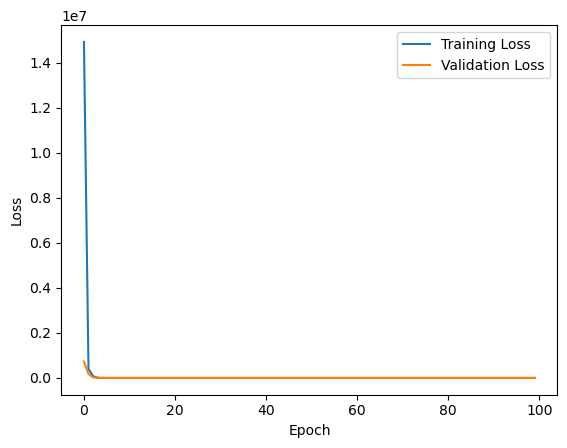

In [151]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('neural_network_training_history.png')
plt.show()

## 4. Model evaluation

In [157]:
# import necessary libraries
import openpyxl
from openpyxl import Workbook

In [158]:
# Create a new workbook
workbook = Workbook()
sheet = workbook.active
sheet.title = 'Model Metrics'

In [159]:
# Define the metrics for each model
model_metrics = [
    ("Linear Regression", lr_mse, lr_rmse, lr_mae, lr_r2),
    ("Random Forest", rf_mse, rf_rmse, rf_mae, rf_r2),
    ("Gradient Boosting", gb_mse, gb_rmse, gb_mae, gb_r2),
    ("Support Vector Regression",svr_mse, svr_rmse, svr_mae, svr_r2),
    ("Decision Trees", dt_mse, dt_rmse, dt_mae, dt_r2),
    ("Lasso Regression", lasso_mse, lasso_rmse, lasso_mae, lasso_r2),
    ("Ridge Regression", ridge_mse, ridge_rmse, ridge_mae, ridge_r2),
    ("Neural Network", nn_mse, nn_rmse, nn_mae, nn_r2)
]

In [160]:
# Add headers
header = ["Model", "MSE", "RMSE", "MAE", "R-squared"]
sheet.append(header)

In [161]:
# Add model metrics to the sheet
for model, mse, rmse, mae, r2 in model_metrics:
    sheet.append([model, mse, rmse, mae, r2])

In [162]:
# Save the workbook
workbook.save('model_metrics.xlsx')
print("Excel workbook saved.")

Excel workbook saved.
